<a href="https://colab.research.google.com/github/VladGKulikov/Applied-Statistics-MSAI-2022/blob/main/HW5_Problem_4_Final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 4. (4 points) Computer experiment. 

Use the following code to load the data and get acquainted with it.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

We will do feature selection on train dataset in three ways:

• (1 point) Test independence hypothesis for every feature with target (10 tests total). Remember
the normality assumption! Don’t forget to account for multiple testing! Fit a linear
regression model using features for which we reject the independence hypothesis. Measure
the error (anything you like, e.g. RMSE or R2) on testing dataset.

• (1 point) Train a regularized regression model with all features considered. Remember the
normality assumption! Read the summary of your fit. Find the confidence intervals for every
coefficient. Fit a new ordinary linear regression model excluding all features that have zero
in the confidence interval. Measure the error (same as before) on testing dataset.

• (1 point) Train a linear regression model for every possible subset of features (210 models)
and select the best model using Akaike information criteria. To use AIC you will need a
probabilistic model, which are available in statsmodels (please don’t use LassoLarsIC
from sklearn.linear_model):
import statsmodels.api as sm
model = sm.OLS(targets, inputs)
result = model.fit()
aic = result.aic
Measure the error (same as before) on testing dataset.

• (1 point) Compare feature sets and test errors of models from two previous steps.

In [ ]:
data = load_diabetes(as_frame=True)
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df = data["frame"]
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**We will do feature selection on train dataset in three ways:**

# $$ -I- $$

• (1 point) Test independence hypothesis for every feature with target (10 tests total). Remember
the normality assumption! Don’t forget to account for multiple testing! Fit a linear
regression model using features for which we reject the independence hypothesis. Measure
the error (anything you like, e.g. RMSE or R2) on testing dataset.

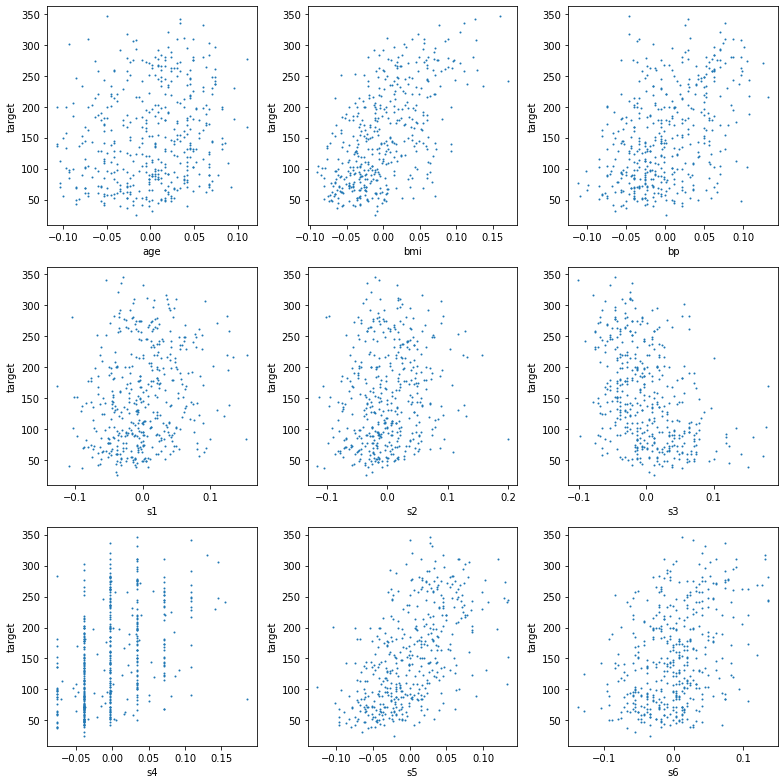

In [ ]:
feature_names = [i for i in df.columns if i != 'sex' and i != 'target']

fig, axs = plt.subplots(3, 3, figsize=(11,11))
# fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3        
        feature = feature_names[n]
        axs[i, j].scatter(df[feature], df['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

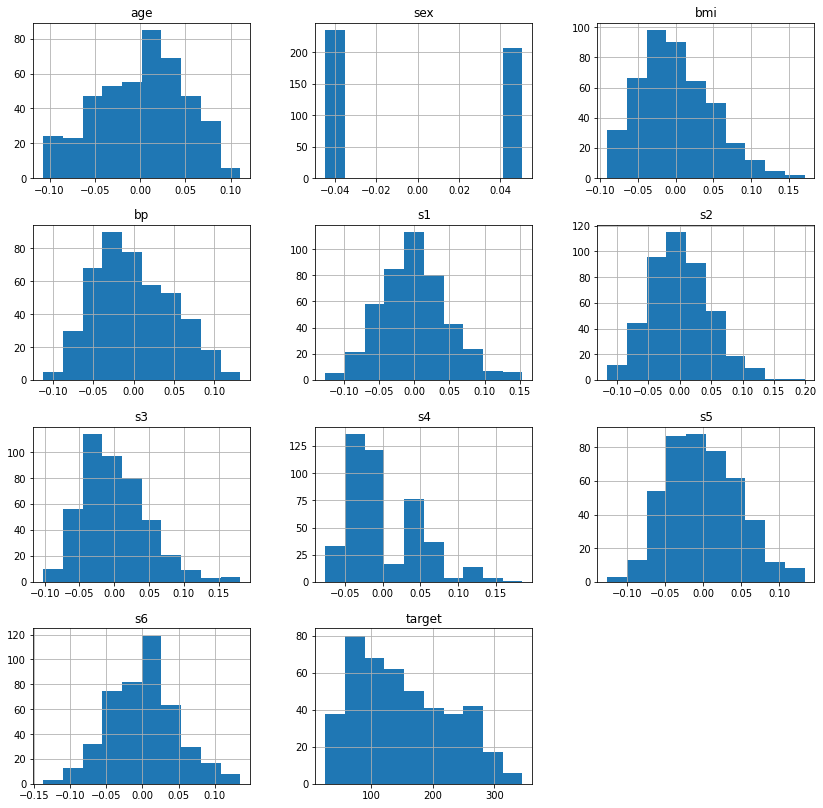

In [ ]:
_ = df.hist( figsize=(14,14))

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
y = df['target']
X = df[[i for i in df.columns if i != 'target']]
X_original_train, X_original__test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normality**


In [ ]:
# The Shapiro-Wilk test for normality.
import scipy.stats as stats
for feature in feature_names:
    shapiro = stats.shapiro(df[feature])
    print(f'For feature: {feature} result the Shapiro-Wilk test - {shapiro}')

For feature: age result the Shapiro-Wilk test - (0.9823582172393799, 3.279272641520947e-05)
For feature: bmi result the Shapiro-Wilk test - (0.9728218913078308, 2.5203468112522387e-07)
For feature: bp result the Shapiro-Wilk test - (0.9836956858634949, 7.139355147955939e-05)
For feature: s1 result the Shapiro-Wilk test - (0.9902805685997009, 0.005133358296006918)
For feature: s2 result the Shapiro-Wilk test - (0.9883028864860535, 0.0013085443060845137)
For feature: s3 result the Shapiro-Wilk test - (0.9631716012954712, 4.433043265805736e-09)
For feature: s4 result the Shapiro-Wilk test - (0.9235599637031555, 3.2725287323759344e-14)
For feature: s5 result the Shapiro-Wilk test - (0.9911459684371948, 0.009544072672724724)
For feature: s6 result the Shapiro-Wilk test - (0.993121862411499, 0.04091504588723183)


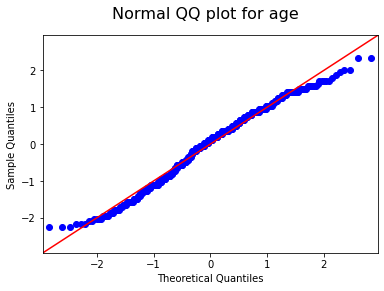

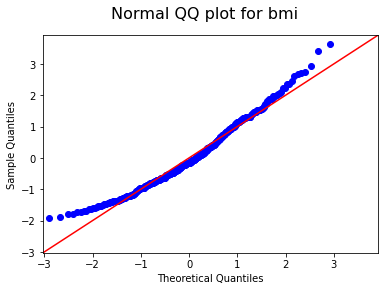

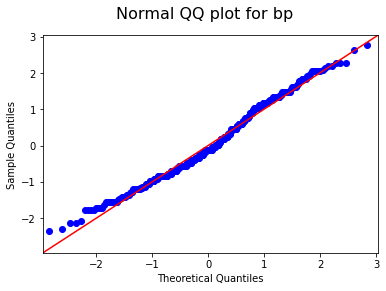

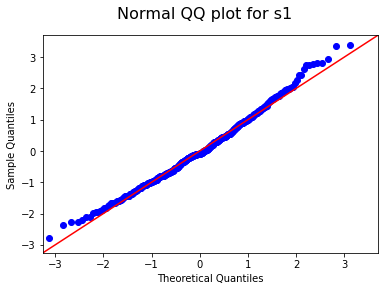

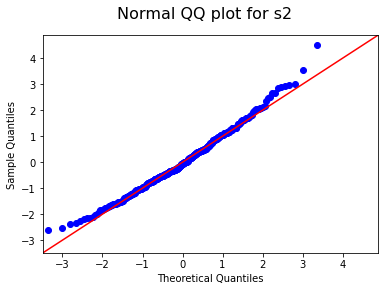

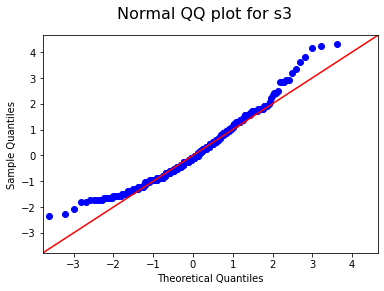

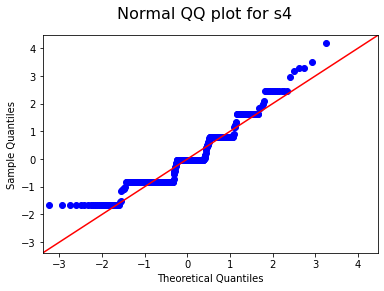

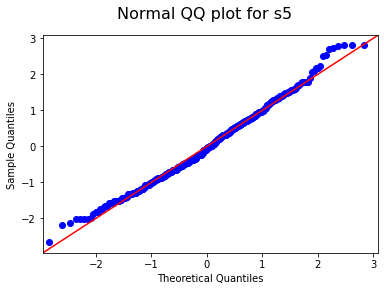

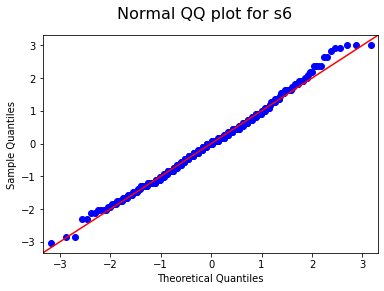

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

for feature in feature_names:        
    fig = sm.qqplot(df[feature], stats.t, fit=True, line="45")    
    fig.suptitle(f'Normal QQ plot for {feature}', fontsize=16)
    plt.show()

**Conclusion about Normality from Shapiro-Wilk test and QQ Plot**

We will suppose that  every feature  and target are both continuous. If we assume that the joint distribution of feature and  target is bivariate Normal (but we see that is only approximation), then we measure the dependence between  them by means of the correlation coefficient ρ.


**Multiple testing**

And I use the Bonferroni Method for multiple testing.

In [ ]:
# http://www.statistics4u.com/fundstat_eng/cc_test_r.html

alpha = 0.05

# The Bonferroni Method:
alpha = alpha / (df_train.shape[-1] - 1)

def t_statistic(pears_pho, n):
    return np.abs(pears_pho) / (np.sqrt(1 - pears_pho**2))*np.sqrt(n - 2)

def t_critical_value(alpha, n):    
    return stats.t.ppf(q = 1 - alpha / 2, df = n-2)

def t_p_value(c, n):    
    return 2*(1 - stats.t.cdf(np.abs(c), df = 2)) ##???df = 2

dependent_feartures = []
independent_feartures = []

feartures = [i for i in df_train.columns if i != 'target']

for fearture in feartures:    
    pears_pho, p_value = stats.pearsonr(df_train[fearture], df_train.target)    
    t = t_statistic(pears_pho, len(df_train))
    c = t_critical_value(alpha, len(df_train))         
    if t > c:
        print(f'Dependent : feature: {fearture}\npears_pho: {pears_pho:.2f} t-statistic ={t:.2f} t-critical = {c:.2f}')
        dependent_feartures.append(fearture)
    else:
        print(f'Independent : feature: {fearture}\npears_pho: {pears_pho:.2f} t-statistic ={t:.2f} t-critical = {c:.2f}')
        independent_feartures.append(fearture)
         
print(f'Dependent feartures : {dependent_feartures}')
print(f'Independent feartures : {independent_feartures}')

Dependent : feature: age
pears_pho: 0.22 t-statistic =4.20 t-critical = 2.82
Independent : feature: sex
pears_pho: 0.03 t-statistic =0.54 t-critical = 2.82
Dependent : feature: bmi
pears_pho: 0.58 t-statistic =13.31 t-critical = 2.82
Dependent : feature: bp
pears_pho: 0.43 t-statistic =8.90 t-critical = 2.82
Dependent : feature: s1
pears_pho: 0.22 t-statistic =4.18 t-critical = 2.82
Dependent : feature: s2
pears_pho: 0.17 t-statistic =3.24 t-critical = 2.82
Dependent : feature: s3
pears_pho: -0.39 t-statistic =7.98 t-critical = 2.82
Dependent : feature: s4
pears_pho: 0.43 t-statistic =9.03 t-critical = 2.82
Dependent : feature: s5
pears_pho: 0.58 t-statistic =13.42 t-critical = 2.82
Dependent : feature: s6
pears_pho: 0.39 t-statistic =7.87 t-critical = 2.82
Dependent feartures : ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Independent feartures : ['sex']


**And we see now that not only for feature 'sex':**

Inependent : feature: sex
pears_pho: 0.07 t-statistic =1.27 t-critical = 2.82

**but very similar behavior we can see for feature 'age', 's1' and 's2':**

Dependent : feature: age
pears_pho: 0.15 t-statistic =2.92 t-critical = 2.82

Dependent : feature: s1
pears_pho: 0.20 t-statistic =3.75 t-critical = 2.82

Dependent : feature: s2
pears_pho: 0.17 t-statistic =3.15 t-critical = 2.82

**We also exclude them from our features.**

In [ ]:
exclude_list = ['target', 'sex', 'age', 's1', 's2']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

In [ ]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print(f'Feartures: {regr.feature_names_in_}\n')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination(r2_score): {r2_score(y_test, y_pred):.2f}')

Feartures: ['bmi' 'bp' 's3' 's4' 's5' 's6']

Mean squared error: 54.14

Coefficient of determination(r2_score): 0.45


**Let's check how the additional exclusion of features affected the result**
and we fit our regresion $with$ all features (except fot target and sex).

In [ ]:
exclude_list = ['target', 'sex']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {r2_score(y_test, y_pred):.2f}')

Feartures: ['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']

Mean squared error: 54.65

Coefficient of determination(r2_score): 0.44


**Conclusion :**

The result is almost the same as if we exclude independent and weakly dependent features. 

This means that we did everything right excluded these features.

# $$ -II- $$

• (1 point) Train a regularized regression model with all features considered. Remember the
normality assumption! Read the summary of your fit. Find the confidence intervals for every
coefficient. Fit a new ordinary linear regression model excluding all features that have zero
in the confidence interval. Measure the error (same as before) on testing dataset.

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

exclude_list = ['target']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

regr = Lasso(alpha=0.05, random_state=42)
result = regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Regression with L1(LASSO) regularization:\n')
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {abs(r2_score(y_test, y_pred)):.2f}')

Regression with L1(LASSO) regularization:

Feartures: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']

Mean squared error: 53.12

Coefficient of determination(r2_score): 0.47


**Confidence intervals**

In [ ]:
exclude_list = ['target', 'sex']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

In [ ]:
from tqdm import tqdm

def bootstrap_confidence_intervals(xx, yy, B=1000, alpha=0.05):
    n = len(xx)
    assert len(yy) == n, 'Sequences must have same length'
    
    coeff = {}
    for fearture in feature_names:
        coeff[fearture] = []

    for i in tqdm(range(B)):
        indexes = np.random.randint(0, n, size=n)
        xx_selected, yy_selected = xx.iloc[indexes], yy.iloc[indexes]
        regr = Lasso(alpha=0.05, random_state=42)
        result = regr.fit(xx_selected, yy_selected)
        for j in range(len(feature_names)):
            coeff[feature_names[j]].append(regr.coef_[j])


   
    confidence_interval = {}
    for fearture in feature_names:
        confidence_interval[fearture] = []

    for feature in feature_names:                
        left_confidence_interval_endpoint = np.percentile(coeff[feature], 2.5) 
        # left or right_confidence_interval_endpoint_normal = mean - + (1.96 * se)        
        right_confidence_interval_endpoint = np.percentile(coeff[feature], 97.5)   
        l, r = left_confidence_interval_endpoint, right_confidence_interval_endpoint        
        confidence_interval[feature] = (l,r)
        plt.title(f'Coefficient for {feature}')
        plt.hist(coeff[feature])                
        plt.show()
        print(f'Coefficient for - {feature}: (l={l:.2f},r={r:.2f})\n\n')         
        
    return confidence_interval 

100%|██████████| 1000/1000 [00:02<00:00, 379.45it/s]


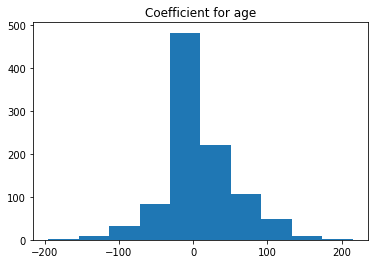

Coefficient for - age: (l=-88.17,r=116.22)




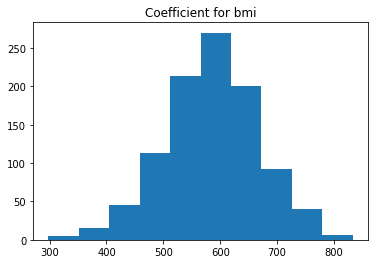

Coefficient for - bmi: (l=410.48,r=743.28)




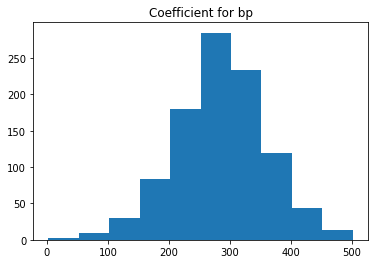

Coefficient for - bp: (l=135.20,r=433.94)




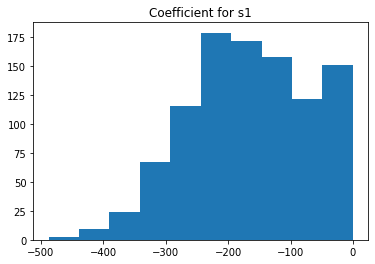

Coefficient for - s1: (l=-363.01,r=0.00)




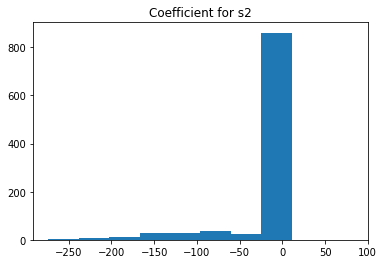

Coefficient for - s2: (l=-157.81,r=0.00)




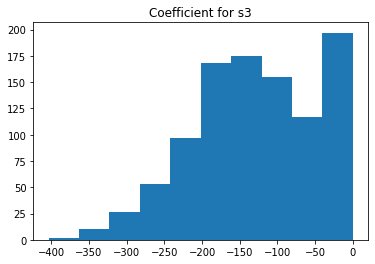

Coefficient for - s3: (l=-296.92,r=0.00)




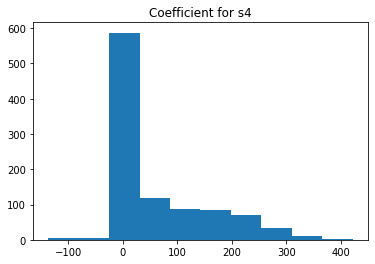

Coefficient for - s4: (l=0.00,r=283.54)




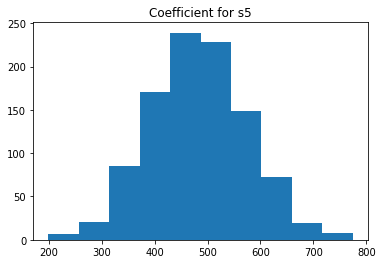

Coefficient for - s5: (l=312.70,r=664.10)




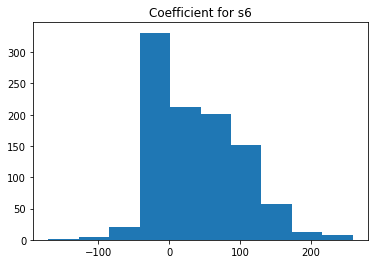

Coefficient for - s6: (l=-42.85,r=161.51)


Confidence_interval for coefficien of feature: age - (-88.16989615936821, 116.22455918271669)
Confidence_interval for coefficien of feature: bmi - (410.4773103118164, 743.2791069441387)
Confidence_interval for coefficien of feature: bp - (135.20133978378155, 433.94085193556737)
Confidence_interval for coefficien of feature: s1 - (-363.0095099416033, 0.0)
Confidence_interval for coefficien of feature: s2 - (-157.80986804299442, 0.0)
Confidence_interval for coefficien of feature: s3 - (-296.91824982989647, 0.0)
Confidence_interval for coefficien of feature: s4 - (0.0, 283.53771382811874)
Confidence_interval for coefficien of feature: s5 - (312.6958648092226, 664.0955719582286)
Confidence_interval for coefficien of feature: s6 - (-42.847946551395715, 161.51102078449833)


In [ ]:
conf_intervals = bootstrap_confidence_intervals(X_train, y_train)
for feature in feature_names:
    print(f'Confidence_interval for coefficien of feature: {feature} - {conf_intervals[feature]}')

**Conclusion about confidence intervals for every coefficient:**

The coefficients of features $age, s1, s2, s4, s 6$ have zero in the confidence interval.

In [ ]:
exclude_list = ['target', 'sex']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {r2_score(y_test, y_pred):.2f}')

Feartures: ['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']

Mean squared error: 54.65

Coefficient of determination(r2_score): 0.44


In [ ]:
exclude_list = ['target', 'sex', 'age', 's1', 's2', 's4', 's6']
feature_names = [i for i in df.columns if i not in exclude_list]
X_train = X_original_train[feature_names]
X_test = X_original__test[feature_names]

regr = Lasso(alpha=0.05, random_state=42)
result = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Regression with L1(LASSO) regularization:\n')
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {abs(r2_score(y_test, y_pred)):.2f}')

Regression with L1(LASSO) regularization:

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.92

Coefficient of determination(r2_score): 0.45


In [ ]:
regr = Ridge(alpha=0.05, random_state=42)
result = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Regression with L2(Ridge) regularization:\n')
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {abs(r2_score(y_test, y_pred)):.2f}')

Regression with L2(Ridge) regularization:

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.94

Coefficient of determination(r2_score): 0.45


In [ ]:
regr = ElasticNet(alpha=0.001, random_state=42)
result = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Regression with L1+L2(ElasticNet) regularization:\n')
print(f'Feartures: {regr.feature_names_in_}\n')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred, squared=False):.2f}\n')
print(f'Coefficient of determination(r2_score): {abs(r2_score(y_test, y_pred)):.2f}')

Regression with L1+L2(ElasticNet) regularization:

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.72

Coefficient of determination(r2_score): 0.46


# $$ -III- $$

• (1 point) Train a linear regression model for every possible subset of features (210 models)
and select the best model using Akaike information criteria. To use AIC you will need a
probabilistic model, which are available in statsmodels (please don’t use LassoLarsIC
from sklearn.linear_model):

Measure the error (same as before) on testing dataset.

In [ ]:
### Akaike information criterion ####
# https://en.wikipedia.org/wiki/Akaike_information_criterion#:~:text=The%20Akaike%20information%20criterion%20(AIC,each%20of%20the%20other%20models.
from sklearn.metrics import mean_squared_error
from functools import reduce
import statsmodels.api as sm

s = {i for i in df_train.columns if i != 'target'}

ps = lambda s: reduce(lambda P, x: P + [subset | {x} for subset in P], s, [set()])

set_of_index = ps(s)
set_of_index.pop(0)
list_aic = []
list_score = []
list_loss = []
min_aic = 0
max_aic = np.Inf

for s in set_of_index:    
    list_of_features = list(s)        
    X1 = df_train[list_of_features]    
    model = sm.OLS(df_train.target, X1)
    result = model.fit()    
    aic = result.aic    
    list_aic.append([aic, list_of_features, result.params, result.mse_model, result.summary()])     

max_aic = max(list_aic)
min_aic = min(list_aic)

In [ ]:
# Probabilistic model for max and min AIC

feature_names_max = [i for i in df.columns if i in max_aic[1]]
X_train = X_original_train[feature_names_max]
X_test = X_original__test[feature_names_max]

modelAIC_max = sm.OLS(y_train, X_train)
resultAIC_max = modelAIC_max.fit()    
y1_predict = resultAIC_max.predict(X_test)

AIC_mse_max = mean_squared_error(y_test, y1_predict, squared=False)

#####

feature_names_min = [i for i in df.columns if i in min_aic[1]]
X_train = X_original_train[feature_names_min]
X_test = X_original__test[feature_names_min]

modelAIC_min = sm.OLS(y_train, X_train)
resultAIC_min = modelAIC_min.fit()    
y2_predict = resultAIC_min.predict(X_test)

AIC_mse_min = mean_squared_error(y_test, y2_predict, squared=False)

#####

print(f'\nProbabilistic model for max AIC = {max_aic[0]:.2f} with parameters: {max_aic[1]}')
print(f'Mse_max_AIC = {AIC_mse_max:.2f}\n')

print(f'\nProbabilistic model for min AIC = {min_aic[0]:.2f} with parameters: {min_aic[1]}')
print(f'Mse_min_AIC = {AIC_mse_min:.2f}\n')


Probabilistic model for max AIC = 4638.42 with parameters: ['s2', 'sex']
Mse_max_AIC = 161.52


Probabilistic model for min AIC = 4600.97 with parameters: ['bp', 'bmi', 's5']
Mse_min_AIC = 164.22



# $$ -IV- $$

• (1 point) Compare feature sets and test errors of models from two previous steps.

# COMPARISON and TEST ERRORS

# **1. Linear Regression without regularization**

$$---$$

exclude_list = ['target', 'sex']

Feartures: ['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']

Mean squared error: 54.65

Coefficient of determination(r2_score): 0.44

$$---$$

exclude_list = ['target', 'sex', 'age', 's1', 's2']

Feartures: ['bmi' 'bp' 's3' 's4' 's5' 's6']

Mean squared error: 54.14

Coefficient of determination(r2_score): 0.45


# **2. Linear Regression with L1, L2, L1 + L2 regularization**

$$-BEST-MODEL-$$

Regression with L1(LASSO) regularization:

exclude_list = ['target']

LR with LASSO - *test № 1* with feartures: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']

**BEST RESULT FOR LR Model** - Mean squared error: **53.12**

**BEST RESULT FOR LR Model** - Coefficient of determination(r2_score): **0.47**

$$---$$

Regression with L1(LASSO) regularization (excluding all features that have zero in the confidence interval):

exclude_list = ['target', 'sex', 'age', 's2', 's4', 's6']

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.92

Coefficient of determination(r2_score): 0.45

$$---$$

Regression with L2(Ridge) regularization(excluding all features that have zero in the confidence interval):

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.94

Coefficient of determination(r2_score): 0.45

$$---$$

Regression with L1+L2(ElasticNet) regularization(excluding all features that have zero in the confidence interval):

Feartures: ['bmi' 'bp' 's3' 's5']

Mean squared error: 53.72

Coefficient of determination(r2_score): 0.46

# **3. Linear Regression with probabilistic model and AIC**

$$---$$

$MODEL-FOR-MAX-AIC$

Probabilistic model for max AIC = 4642.59 with parameters: ['sex']

Mse_max_AIC = 162.86

$$---$$

$MODEL-FOR-MIN-AIC$

Probabilistic model for min AIC = 4601.28 with parameters: ['bmi', 's5']

Mse_min_AIC = 163.77

# ADDITIONS - FOR ME -  RandomForestRegressor, LinearRegression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['target']
X = df.drop(['target'], inplace=False, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model2 = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42).fit(X_train, y_train)
print(f'Train sore:{model2.score(X_train, y_train)}')
print(f'Test sore:{model2.score(X_test, y_test)}')
y_predictions = model2.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, y_predictions, squared=False)}')

Train sore:0.9134406137486042
Test sore:0.43510448959864045
MSE = 54.707423044429184


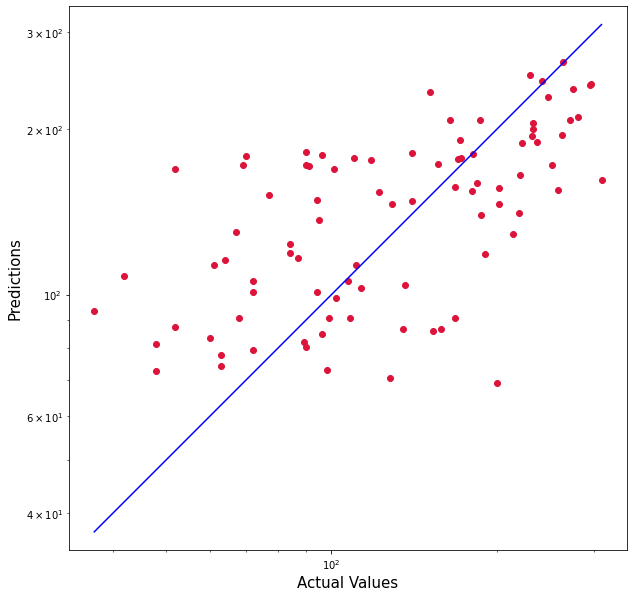

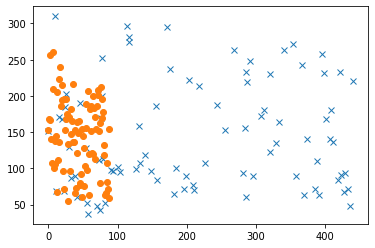

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predictions), max(y_test))
p2 = min(min(y_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.plot(y_test, 'x')
plt.plot(y_pred, 'o')
plt.show()

In [ ]:
model3 = LinearRegression().fit(X_train, y_train)
print(f'Train sore:{model3.score(X_train, y_train)}')
print(f'Test sore:{model3.score(X_test, y_test)}')
y_predictions = model3.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, y_predictions, squared=False)}')

Train sore:0.5279198995709651
Test sore:0.4526066021617381
MSE = 53.853256984914395


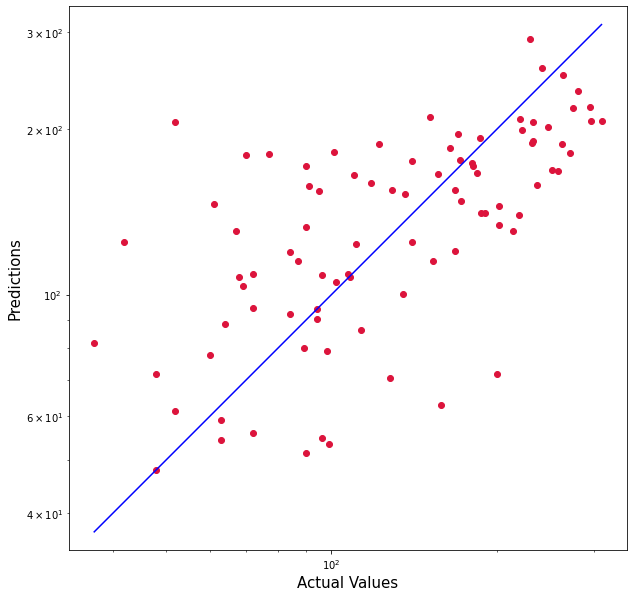

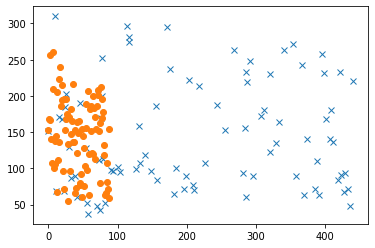

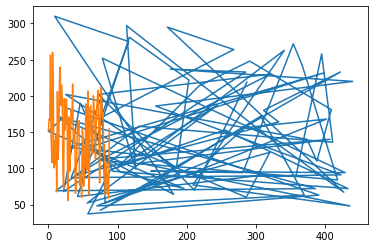

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predictions), max(y_test))
p2 = min(min(y_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.plot(y_test, 'x')
plt.plot(y_pred, 'o')
plt.show()

plt.plot(y_test)
plt.plot(y_pred)
plt.show()